# Instacart Market Basket Analysis

Valentino Fredrick Albert Mamesah (1305223104)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# SEGMENT 1: EKSPLORASI DATA

In [3]:
cc_path = '/content/drive/MyDrive/Dataset TCCBDA/Credit Card Fraud Detection/creditcard.csv'
cc = pd.read_csv(cc_path )

In [4]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

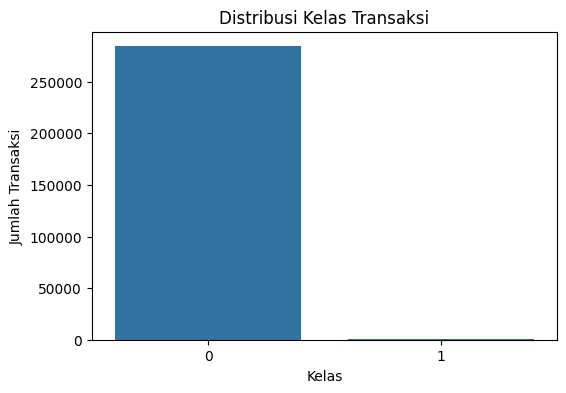

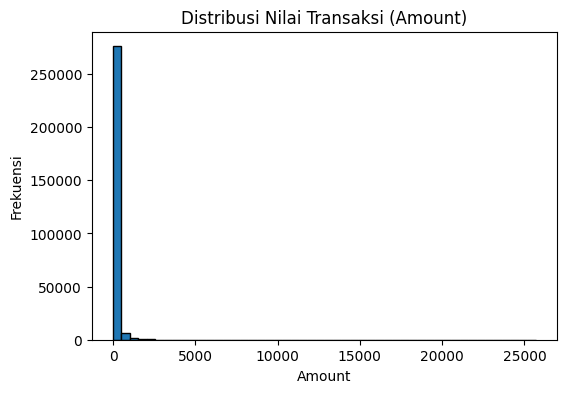

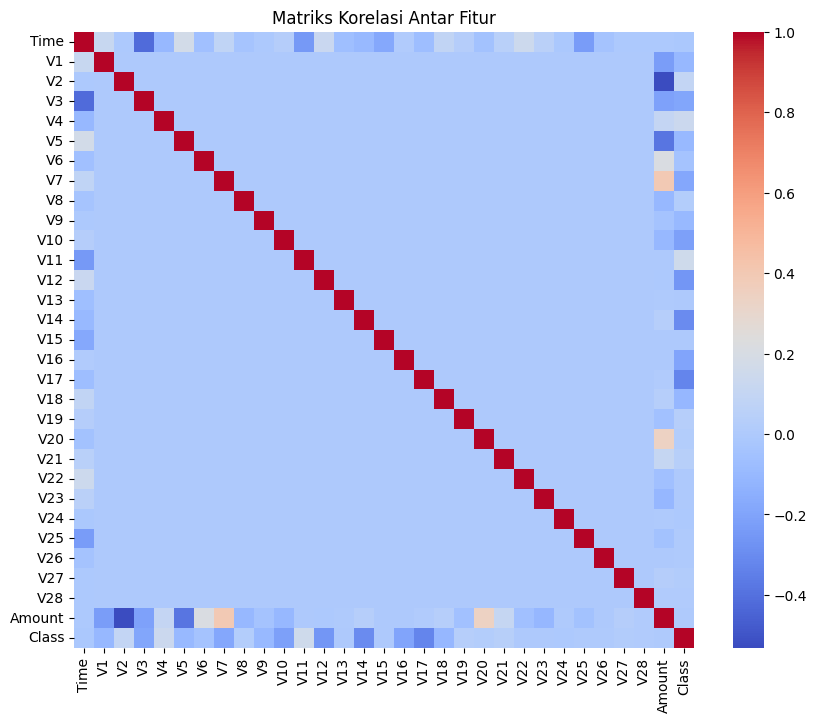

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Menampilkan statistik deskriptif
print(cc.describe())

# 2. Visualisasi Data

# Distribusi kelas
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=cc)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Transaksi')
plt.title('Distribusi Kelas Transaksi')
plt.show()

# Histogram untuk kolom Amount
plt.figure(figsize=(6,4))
plt.hist(cc['Amount'], bins=50, edgecolor='k')
plt.xlabel('Amount')
plt.ylabel('Frekuensi')
plt.title('Distribusi Nilai Transaksi (Amount)')
plt.show()

# Menghitung matriks korelasi
correlation_matrix = cc.corr()

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

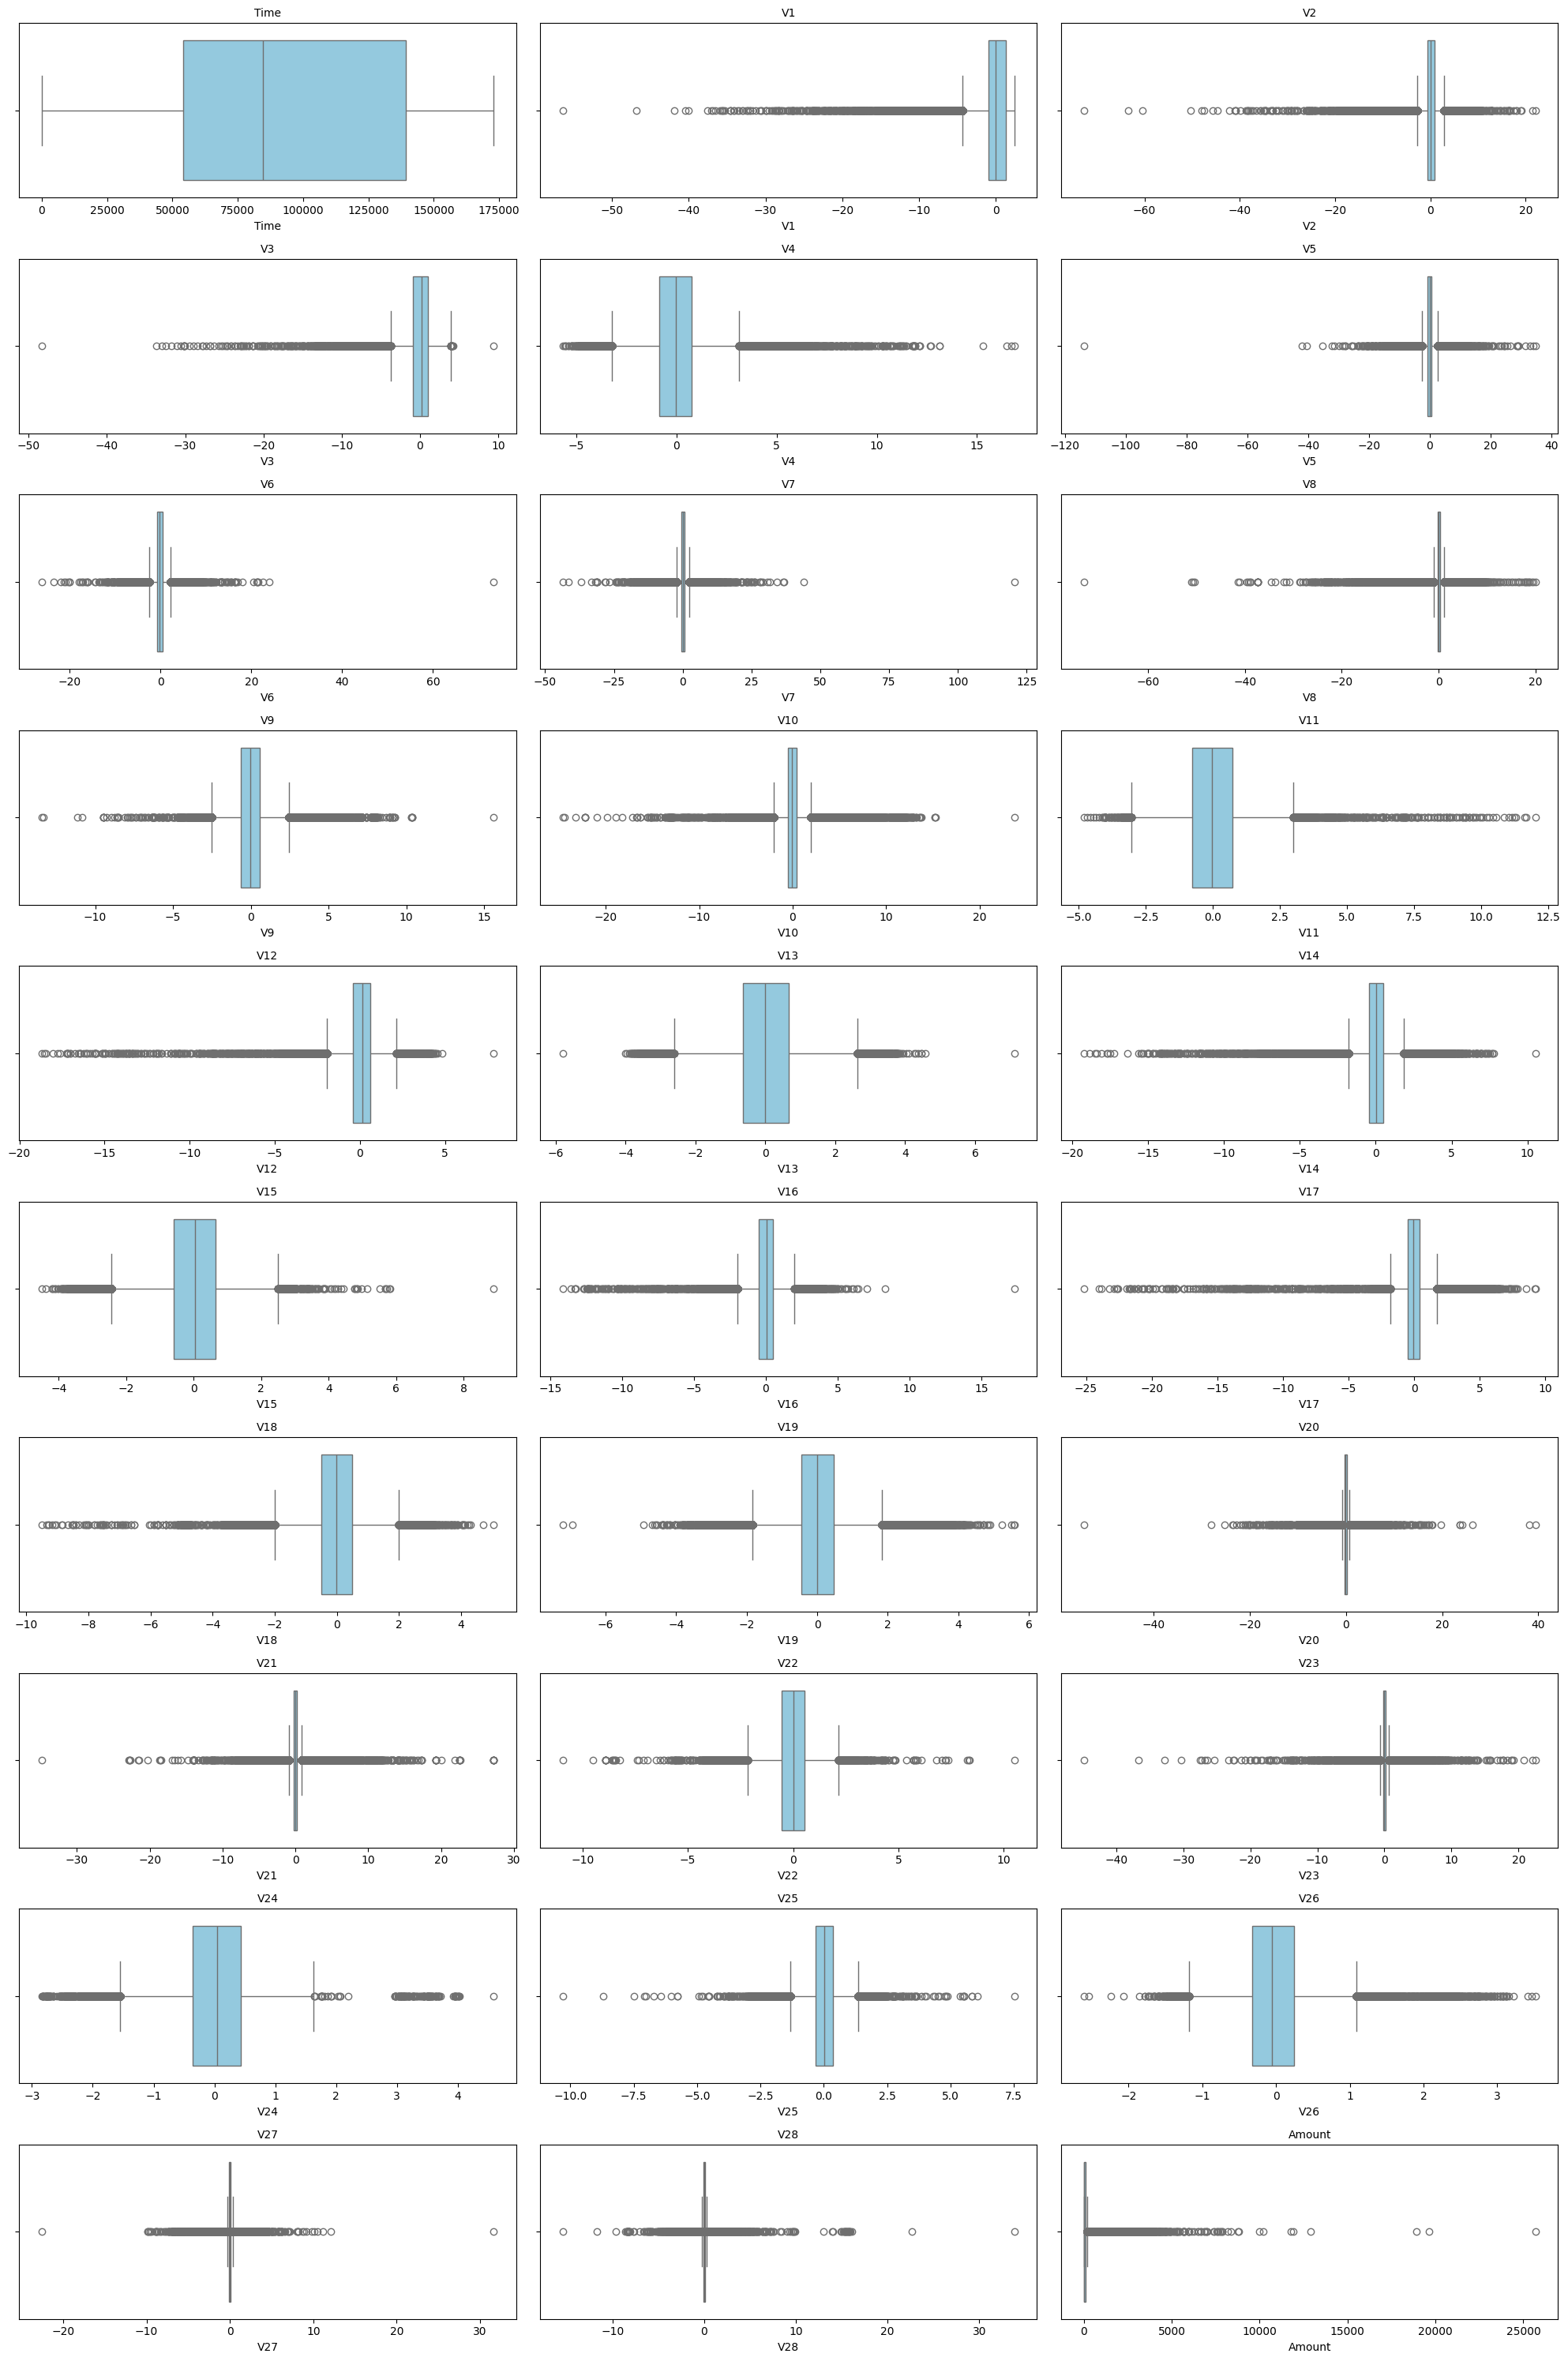

In [10]:
'''
# Pilih kolom numerik (kecuali 'Class')
numeric_cols = cc.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Class' in numeric_cols:
    numeric_cols.remove('Class')

# Tentukan ukuran figure, sesuaikan jumlah subplot dengan jumlah kolom yang akan diplot
plt.figure(figsize=(20, 30))

# Loop untuk membuat boxplot tiap fitur
for i, col in enumerate(numeric_cols):
    plt.subplot(10, 3, i+1)  # Sesuaikan grid subplot, misal 10 baris x 3 kolom
    sns.boxplot(x=cc[col], color='skyblue')
    plt.title(col, fontsize=10)

plt.tight_layout()
plt.show()
'''

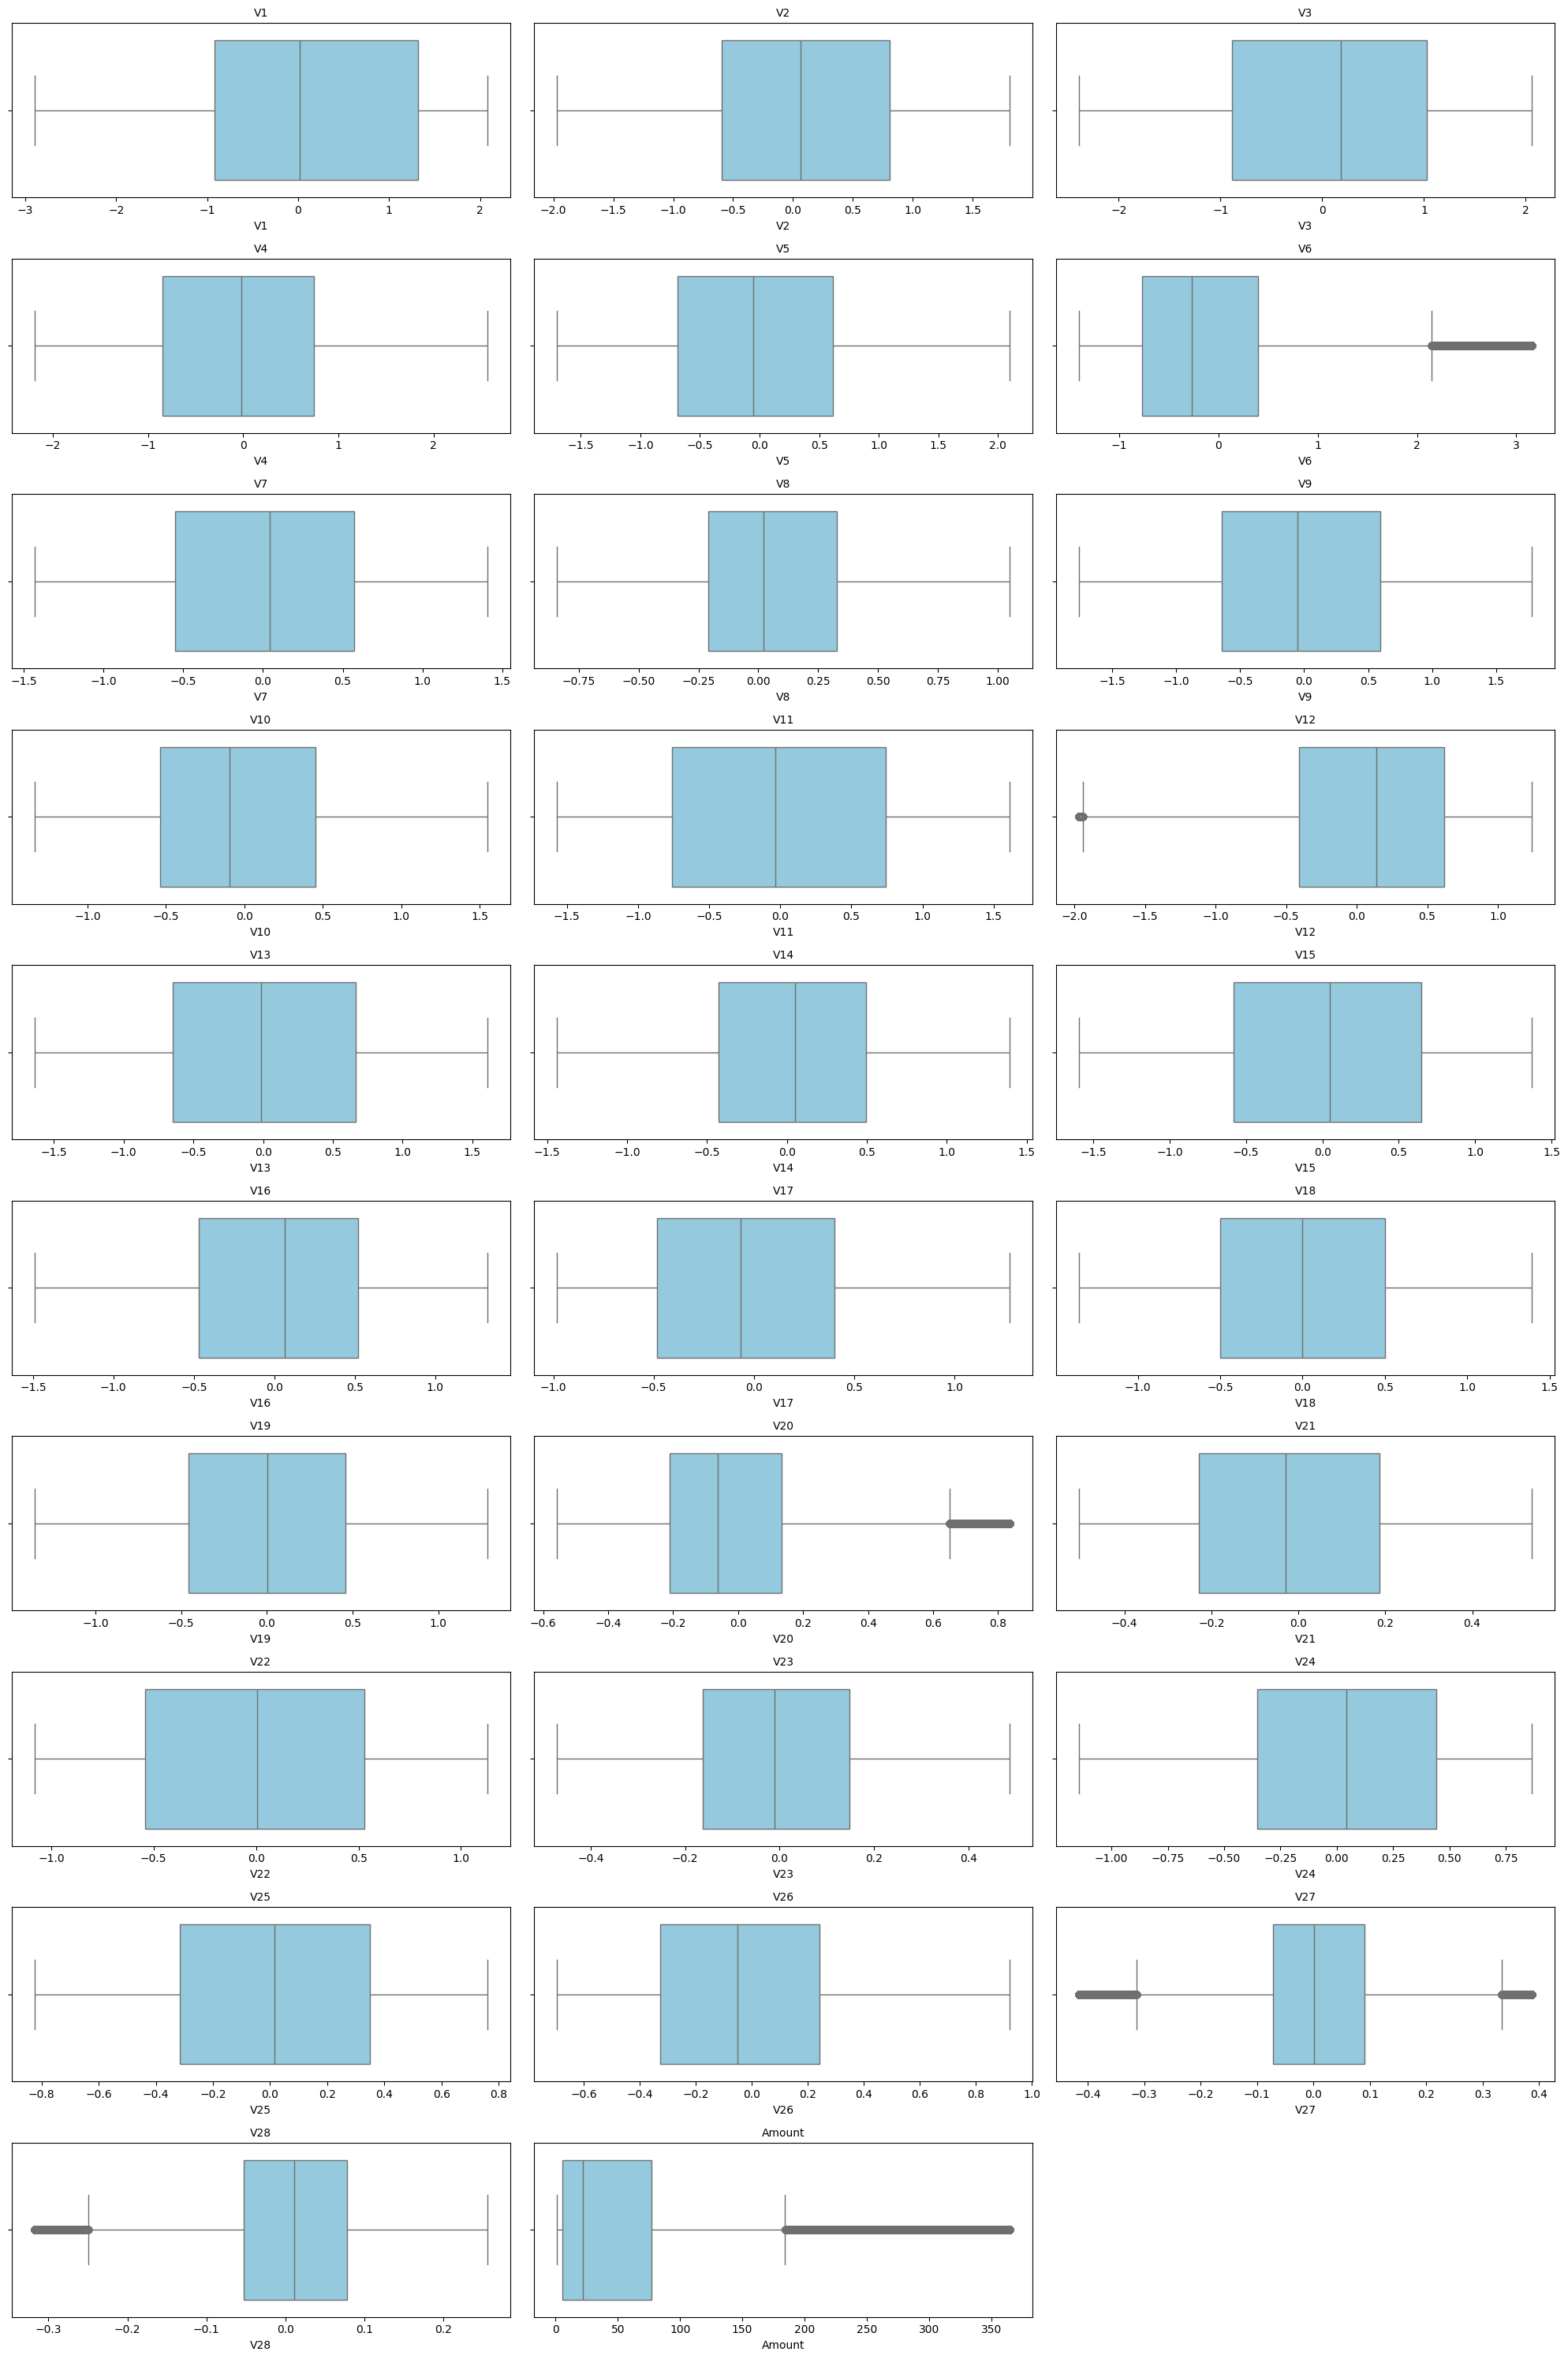

In [13]:
'''
from scipy.stats.mstats import winsorize

numeric_cols = cc.select_dtypes(include=['float64', 'int64']).columns.tolist()
for col_exclude in ['Class', 'Time']:
    if col_exclude in numeric_cols:
        numeric_cols.remove(col_exclude)

# Copy dataset untuk winsorization
cc_winsorized = cc.copy()

# Lakukan winsorization pada setiap kolom yang telah dipilih
for col in numeric_cols:
    cc_winsorized[col] = winsorize(cc_winsorized[col], limits=[0.05, 0.05])

# Visualisasikan boxplot setelah winsorization
plt.figure(figsize=(20, 30))
for i, col in enumerate(numeric_cols):
    plt.subplot(10, 3, i+1)
    sns.boxplot(x=cc_winsorized[col], color='skyblue')
    plt.title(col, fontsize=10)
plt.tight_layout()
plt.show()
'''

# SEGMENT 2: DATA PREPARATION

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

!pip install imblearn
from imblearn.over_sampling import SMOTE

In [8]:
cc.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [5]:
# Pemilihan Fitur & Label

X = cc.drop('Class', axis=1)
y = cc['Class']

In [6]:
# 2. Skalasi Fitur Numerik

# Buat objek StandardScaler
scaler = StandardScaler()

# Kolom yang akan diskalakan
cols_to_scale = ['Time', 'Amount']

# Lakukan fit_transform pada kolom terpilih
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

# Cek hasil scaling (5 baris pertama)
print("\nContoh hasil scaling pada kolom Time & Amount:")
print(X[cols_to_scale].head())


Contoh hasil scaling pada kolom Time & Amount:
       Time    Amount
0 -1.996583  0.244964
1 -1.996583 -0.342475
2 -1.996562  1.160686
3 -1.996562  0.140534
4 -1.996541 -0.073403


In [7]:
# 3. Split Data (Train/Test)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("\nUkuran Data Train & Test:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape,  "y_test :", y_test.shape)


Ukuran Data Train & Test:
X_train: (199364, 30) y_train: (199364,)
X_test : (85443, 30) y_test : (85443,)


In [8]:
# 4. Menangani Ketidakseimbangan Kelas (SMOTE)

# Periksa distribusi kelas sebelum SMOTE
print("\nDistribusi Kelas Sebelum SMOTE:")
print(y_train.value_counts())

# Inisialisasi SMOTE
sm = SMOTE(random_state=42)

# Oversampling hanya dilakukan pada data train
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Periksa distribusi kelas setelah SMOTE
print("\nDistribusi Kelas Setelah SMOTE:")
print(y_train_resampled.value_counts())


Distribusi Kelas Sebelum SMOTE:
Class
0    199020
1       344
Name: count, dtype: int64

Distribusi Kelas Setelah SMOTE:
Class
0    199020
1    199020
Name: count, dtype: int64


# SEGMENT 3: MODELING

In [9]:
!pip install tqdm_joblib

=== Baseline Model: Logistic Regression (Default Parameters) ===
Training Baseline Logistic Regression...
Baseline Logistic Regression training selesai. [100%]

--- Evaluasi Baseline Logistic Regression ---
              precision    recall  f1-score   support

           0     0.9998    0.9774    0.9885     85295
           1     0.0632    0.8784    0.1179       148

    accuracy                         0.9772     85443
   macro avg     0.5315    0.9279    0.5532     85443
weighted avg     0.9982    0.9772    0.9870     85443



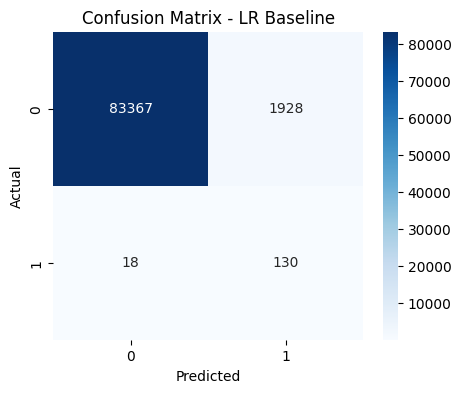


=== Hyperparameter Tuning: Logistic Regression ===


Logistic Regression Tuning Progress:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Logistic Regression tuning selesai. [100%]
Best Parameters: {'C': 10, 'penalty': 'l2'}
Best CV F1 Score: 0.9585683222067864
Tuning time: 60.38 seconds

=== Evaluasi Model Tuned pada Data Uji ===
              precision    recall  f1-score   support

           0     0.9998    0.9774    0.9885     85295
           1     0.0631    0.8784    0.1178       148

    accuracy                         0.9772     85443
   macro avg     0.5315    0.9279    0.5531     85443
weighted avg     0.9982    0.9772    0.9869     85443



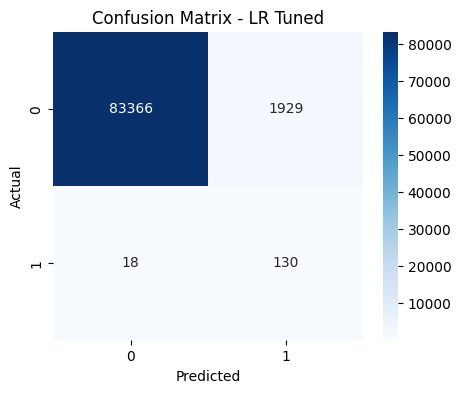

In [11]:
import time
from tqdm import tqdm
from tqdm_joblib import tqdm_joblib

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# 1. Baseline Model (Default Parameter)
print("=== Baseline Model: Logistic Regression (Default Parameters) ===")

print("Training Baseline Logistic Regression...")
lr_baseline = LogisticRegression(
    random_state=42,
    solver='liblinear',
    class_weight='balanced',
    max_iter=1000
)
lr_baseline.fit(X_train_resampled, y_train_resampled)
print("Baseline Logistic Regression training selesai. [100%]")

# Evaluasi baseline pada data uji
y_pred_lr_baseline = lr_baseline.predict(X_test)
print("\n--- Evaluasi Baseline Logistic Regression ---")
print(classification_report(y_test, y_pred_lr_baseline, digits=4))
cm = confusion_matrix(y_test, y_pred_lr_baseline)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - LR Baseline")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. Hyperparameter Tuning (GridSearchCV) dengan Progress Bar
print("\n=== Hyperparameter Tuning: Logistic Regression ===")

lr = LogisticRegression(
    random_state=42,
    solver='liblinear',
    class_weight='balanced',
    max_iter=1000
)

# Grid hyperparameter
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}
# Total kombinasi = 3 * 2 = 6; dengan cv=2 → 6 * 2 = 12 iterasi
grid_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    scoring='f1',
    cv=2,
    n_jobs=-1,
    verbose=0
)

start_time = time.time()
with tqdm_joblib(tqdm(total=12, desc="Logistic Regression Tuning Progress")):
    grid_lr.fit(X_train_resampled, y_train_resampled)
end_time = time.time()

print("Logistic Regression tuning selesai. [100%]")
print("Best Parameters:", grid_lr.best_params_)
print("Best CV F1 Score:", grid_lr.best_score_)
print("Tuning time: {:.2f} seconds".format(end_time - start_time))

# 3. Evaluasi Model Tuned pada Data Uji
print("\n=== Evaluasi Model Tuned pada Data Uji ===")
lr_tuned = grid_lr.best_estimator_
y_pred_lr_tuned = lr_tuned.predict(X_test)
print(classification_report(y_test, y_pred_lr_tuned, digits=4))
cm = confusion_matrix(y_test, y_pred_lr_tuned)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - LR Tuned")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
